In [1]:
import numpy as np
import pandas as pd
from pprint import pprint as pp

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings(action="ignore")

</br>

# 1. 데이터 로드 및 탐색

In [2]:
# https://www.kaggle.com/rishabhm76/pima-diabetes-database
df = pd.read_csv('./datasets/Pima Indians Diabetes Database.csv')

df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()
# 총 768 명의 pima indian 성인 여성의 정보
# 널 값은 없다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

### <속성>
- Number of times pregnant : 임신 횟수 (임신)
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test : 경구 포도당 내성 검사 (plas)에서 혈장 포도당 농도 2 시간
- Diastolic blood pressure (mm Hg) : 이완기 혈압 (mmHg)
- Triceps skin fold thickness (mm) : 삼두근 피부 접힘 두께 (mm)
- 2-Hour serum insulin (mu U/ml) : mu U / ml (insu)의 2 시간 혈청 인슐린
- Body mass index (weight in kg/(height in m)^2) : 체중 (kg / (m)) ^ 2 (질량)로 측정 한 체질량 지수
- Diabetes pedigree function : 당뇨병 혈통 기능 (pedi)
- Age (years) : 연령 (연령)
- Class variable (0 or 1) : target 속성 (0: 당뇨병 아님, 1: 당뇨병)


당뇨병: 공복 혈당치가 126mg/dL 이상 또는 경구 당부하 검사 2시간 후 혈당치가 200mg/dL 이상이면 당뇨병으로 진단합니다. 다른 날 동일한 검사를 반복해 확인을 거쳐 당뇨병을 진단받습니다.

In [4]:
df.columns = ['pregnant', 'oral_gluc_tol_test', 'bp', 'skin_thick', 'insulin', 'bmi', 'pedi','age','diabetes']
df

,pregnant,oral_gluc_tol_test,bp,skin_thick,insulin,bmi,pedi,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: pregnant, dtype: float64


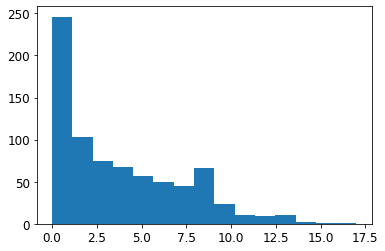

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: oral_gluc_tol_test, dtype: float64


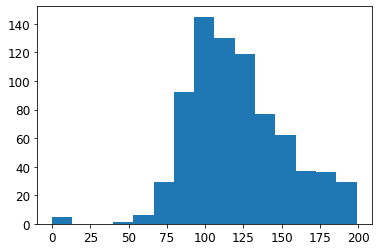

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: bp, dtype: float64


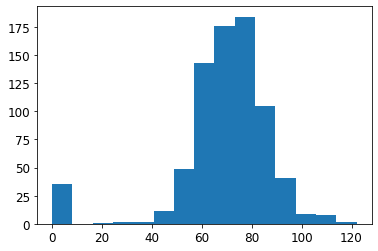

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: skin_thick, dtype: float64


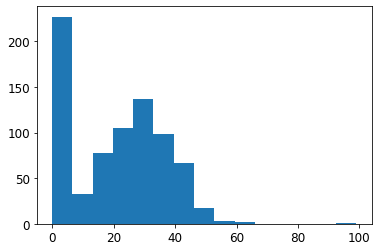

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: insulin, dtype: float64


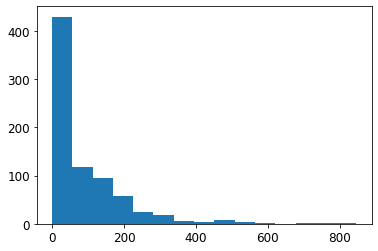

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: bmi, dtype: float64


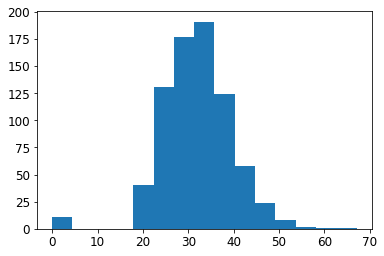

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: pedi, dtype: float64


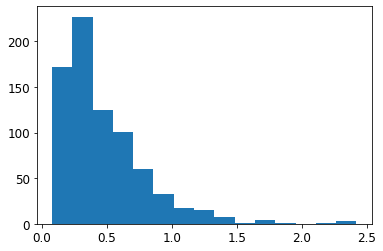

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64


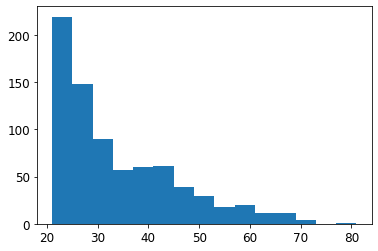

In [5]:
for i in df.index[0:8] : 
    print(df.iloc[:,i].describe())
    plt.hist(df.iloc[:,i], bins = 15)
    plt.show()

diabetes
0    500
1    268
Name: diabetes, dtype: int64
diabetes
0    0.65
1    0.35
Name: diabetes, dtype: float64


(array([500., 268.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

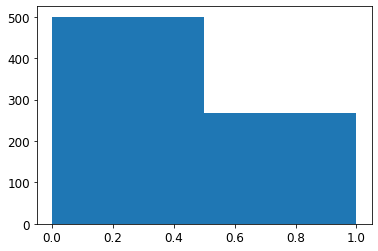

In [6]:
# 타겟 레이블
print(df.groupby('diabetes').diabetes.count())
print(round (df.groupby('diabetes').diabetes.count() / df.shape[0], 2))
plt.hist(df.diabetes, bins = 2)

</br>

</br>

# 2. 학습 데이터와 테스트 데이터 준비 

In [7]:
X = df.iloc[:,:8].values
y = df['diabetes'].values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42,
                                                    shuffle = True, stratify = y)

In [9]:
# 계층적 샘플링 결과 확인 - 전체 샘플 중 양성 샘플의 비율
print(y_test.sum() / y_test.shape)
print(y_train.sum() / y_train.shape)

[0.34895833]
[0.34895833]


### < 선형 모델을 위한 Scaling >

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

</br>

# 3. 모델 학습과 그리드 서치

In [11]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

def print_scores (data, pred):
    print("recall_score : ", recall_score(data, pred))
    print("precision_score : ", precision_score(data, pred))
    print("accuracy_score : ", accuracy_score(data, pred))
    print("f1_score : ", f1_score(data, pred))
    
from sklearn.model_selection import StratifiedKFold
skfolds = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

## 1) 로지스틱 회귀

### (i) 선형 분류

In [36]:
# C, class_weight에 대해 그리드 서치
from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression(random_state=42, max_iter = 200)

from sklearn.model_selection import GridSearchCV
param_grid = [{'C':[0.1,1,2,3,4,5,6,7,8,9,10],'class_weight': [None, 'balanced']}]

grid_search1 = GridSearchCV(log_reg1, param_grid, cv = skfolds, scoring = "f1",
                           verbose = 3)

grid_search1.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 22 candidates, totalling 88 fits
[CV] C=0.1, class_weight=None ........................................
[CV] ............ C=0.1, class_weight=None, score=0.565, total=   0.0s
[CV] C=0.1, class_weight=None ........................................
[CV] ............ C=0.1, class_weight=None, score=0.651, total=   0.0s
[CV] C=0.1, class_weight=None ........................................
[CV] ............ C=0.1, class_weight=None, score=0.644, total=   0.0s
[CV] C=0.1, class_weight=None ........................................
[CV] ............ C=0.1, class_weight=None, score=0.674, total=   0.0s
[CV] C=0.1, class_weight=balanced ....................................
[CV] ........ C=0.1, class_weight=balanced, score=0.617, total=   0.0s
[CV] C=0.1, class_weight=balanced ....................................
[CV] ........ C=0.1, class_weight=balanced, score=0.661, total=   0.0s
[CV] C=0.1, class_weight=balanced ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, class_weight=balanced, score=0.661, total=   0.0s
[CV] C=1, class_weight=balanced ......................................
[CV] .......... C=1, class_weight=balanced, score=0.654, total=   0.0s
[CV] C=1, class_weight=balanced ......................................
[CV] .......... C=1, class_weight=balanced, score=0.709, total=   0.0s
[CV] C=2, class_weight=None ..........................................
[CV] .............. C=2, class_weight=None, score=0.575, total=   0.0s
[CV] C=2, class_weight=None ..........................................
[CV] .............. C=2, class_weight=None, score=0.652, total=   0.0s
[CV] C=2, class_weight=None ..........................................
[CV] .............. C=2, class_weight=None, score=0.659, total=   0.0s
[CV] C=2, class_weight=None ..........................................
[CV] .............. C=2, class_weight=None, score=0.667, total=   0.0s
[CV] C=2, class_weight=balanced ......................................
[CV] .

[CV] .............. C=9, class_weight=None, score=0.575, total=   0.0s
[CV] C=9, class_weight=None ..........................................
[CV] .............. C=9, class_weight=None, score=0.652, total=   0.0s
[CV] C=9, class_weight=None ..........................................
[CV] .............. C=9, class_weight=None, score=0.644, total=   0.0s
[CV] C=9, class_weight=None ..........................................
[CV] .............. C=9, class_weight=None, score=0.667, total=   0.0s
[CV] C=9, class_weight=balanced ......................................
[CV] .......... C=9, class_weight=balanced, score=0.636, total=   0.0s
[CV] C=9, class_weight=balanced ......................................
[CV] .......... C=9, class_weight=balanced, score=0.661, total=   0.0s
[CV] C=9, class_weight=balanced ......................................
[CV] .......... C=9, class_weight=balanced, score=0.654, total=   0.0s
[CV] C=9, class_weight=balanced ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    1.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=200, random_state=42),
             param_grid=[{'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'class_weight': [None, 'balanced']}],
             scoring='f1', verbose=3)

In [37]:
print(grid_search1.best_params_, grid_search1.best_score_)

{'C': 2, 'class_weight': 'balanced'} 0.6664666037897625


In [38]:
print(grid_search1.best_estimator_.coef_)
print(grid_search1.best_estimator_.intercept_)

[[ 0.44252197  1.08549031 -0.20115349 -0.0263459  -0.07275926  0.73801014
   0.28902398  0.2018693 ]]
[-0.27229606]


### (ii) 비선형 분류 

In [115]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 10, include_bias = False)
X_train_scaled_poly = poly_features.fit_transform(X_train_scaled)

log_reg2 = LogisticRegression(random_state=42, max_iter = 200)

param_grid = [{'C':[2,5,6],'class_weight': [None, 'balanced']}]

grid_search2 = GridSearchCV(log_reg2, param_grid, cv = skfolds, scoring = "f1",
                           verbose = 3)

grid_search2.fit(X_train_scaled_poly, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] C=2, class_weight=None ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=2, class_weight=None, score=0.549, total=  25.7s
[CV] C=2, class_weight=None ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.7s remaining:    0.0s


[CV] .............. C=2, class_weight=None, score=0.612, total=  24.6s
[CV] C=2, class_weight=None ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   50.3s remaining:    0.0s


[CV] .............. C=2, class_weight=None, score=0.488, total=  18.8s
[CV] C=2, class_weight=None ..........................................
[CV] .............. C=2, class_weight=None, score=0.646, total=  23.9s
[CV] C=2, class_weight=balanced ......................................
[CV] .......... C=2, class_weight=balanced, score=0.547, total=  27.6s
[CV] C=2, class_weight=balanced ......................................
[CV] .......... C=2, class_weight=balanced, score=0.596, total=  23.2s
[CV] C=2, class_weight=balanced ......................................
[CV] .......... C=2, class_weight=balanced, score=0.543, total=  24.2s
[CV] C=2, class_weight=balanced ......................................
[CV] .......... C=2, class_weight=balanced, score=0.647, total=  21.4s
[CV] C=5, class_weight=None ..........................................
[CV] .............. C=5, class_weight=None, score=0.527, total=   9.1s
[CV] C=5, class_weight=None ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  9.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=200, random_state=42),
             param_grid=[{'C': [2, 5, 6], 'class_weight': [None, 'balanced']}],
             scoring='f1', verbose=3)

In [116]:
print(grid_search2.best_params_, grid_search2.best_score_)

{'C': 6, 'class_weight': 'balanced'} 0.5999453506358778


In [ ]:
print(grid_search2.best_estimator_.coef_)
print(grid_search2.best_estimator_.intercept_)

#### -> 결론 : 다항 특성을 추가하지 않고 C = 2, class_weight = 'balanced'로 설정하는 것이 성능이 가장 좋음

In [39]:
# 최적의 파라미터로 설정 
log_reg =  grid_search1.best_estimator_

# 교차 검증을 통한 예측
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(log_reg, X_train_scaled, y_train, cv = skfolds)

# 점수 
print_scores (y_train, y_train_pred)

# 오차 행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

recall_score :  0.7164179104477612
precision_score :  0.6233766233766234
accuracy_score :  0.75
f1_score :  0.6666666666666666


array([[288,  87],
       [ 57, 144]])

</br>

## 2) 서포트벡터머신

### (i) 선형 분류 - LinearSVC

In [142]:
# C, class_weight에 대해 그리드 서치
from sklearn.svm import LinearSVC
svm_clf1 = LinearSVC(loss="hinge", random_state=42)

# from sklearn.model_selection import GridSearchCV
param_grid = [{'C':[0.1,1,2,3,4,5,6,7,8,9,10],'class_weight': [None, 'balanced']}]

grid_search1 = GridSearchCV(svm_clf1, param_grid, cv = skfolds, scoring = "f1",
                           verbose = 3)

grid_search1.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 22 candidates, totalling 88 fits
[CV] C=0.1, class_weight=None ........................................
[CV] ............ C=0.1, class_weight=None, score=0.541, total=   0.0s
[CV] C=0.1, class_weight=None ........................................
[CV] ............ C=0.1, class_weight=None, score=0.681, total=   0.0s
[CV] C=0.1, class_weight=None ........................................
[CV] ............ C=0.1, class_weight=None, score=0.652, total=   0.0s
[CV] C=0.1, class_weight=None ........................................
[CV] ............ C=0.1, class_weight=None, score=0.674, total=   0.0s
[CV] C=0.1, class_weight=balanced ....................................
[CV] ........ C=0.1, class_weight=balanced, score=0.635, total=   0.0s
[CV] C=0.1, class_weight=balanced ....................................
[CV] ........ C=0.1, class_weight=balanced, score=0.685, total=   0.0s
[CV] C=0.1, class_weight=balanced ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=3, class_weight=balanced, score=0.673, total=   0.0s
[CV] C=3, class_weight=balanced ......................................
[CV] .......... C=3, class_weight=balanced, score=0.692, total=   0.0s
[CV] C=4, class_weight=None ..........................................
[CV] .............. C=4, class_weight=None, score=0.548, total=   0.0s
[CV] C=4, class_weight=None ..........................................
[CV] .............. C=4, class_weight=None, score=0.703, total=   0.0s
[CV] C=4, class_weight=None ..........................................
[CV] .............. C=4, class_weight=None, score=0.652, total=   0.0s
[CV] C=4, class_weight=None ..........................................
[CV] .............. C=4, class_weight=None, score=0.681, total=   0.0s
[CV] C=4, class_weight=balanced ......................................
[CV] .......... C=4, class_weight=balanced, score=0.642, total=   0.0s
[CV] C=4, class_weight=balanced ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    0.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=LinearSVC(loss='hinge', random_state=42),
             param_grid=[{'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'class_weight': [None, 'balanced']}],
             scoring='f1', verbose=3)

In [146]:
print(grid_search1.best_params_, grid_search1.best_score_)

{'C': 3, 'class_weight': 'balanced'} 0.6730198086330161


In [148]:
print(grid_search1.best_estimator_.coef_)
print(grid_search1.best_estimator_.intercept_)

[[ 0.30249266  0.86211885 -0.16301671 -0.09715976  0.02900549  0.53433097
   0.27810311  0.18554498]]
[-0.29617929]


</br>

### (ii) 비선형 분류 - SVC 커널 트릭

In [43]:
# 다항 커널 SVC 모델을 C, degree, coef0에 대해 그리드 서치
from sklearn.svm import SVC
svm_clf2 = SVC(kernel = 'poly', gamma='scale', class_weight='balanced', probability=True)

# from sklearn.model_selection import GridSearchCV
param_grid = [{'C':[0.01,0.1,1,2],'degree': [1,2,3],'coef0' :[1,30,50]}]

grid_search2 = GridSearchCV(svm_clf2, param_grid, cv = skfolds, scoring = "f1",
                           verbose = 3)

grid_search2.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV] C=0.01, coef0=1, degree=1 .......................................
[CV] ........... C=0.01, coef0=1, degree=1, score=0.627, total=   0.0s
[CV] C=0.01, coef0=1, degree=1 .......................................
[CV] ........... C=0.01, coef0=1, degree=1, score=0.640, total=   0.0s
[CV] C=0.01, coef0=1, degree=1 .......................................
[CV] ........... C=0.01, coef0=1, degree=1, score=0.646, total=   0.0s
[CV] C=0.01, coef0=1, degree=1 .......................................
[CV] ........... C=0.01, coef0=1, degree=1, score=0.642, total=   0.0s
[CV] C=0.01, coef0=1, degree=2 .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... C=0.01, coef0=1, degree=2, score=0.617, total=   0.1s
[CV] C=0.01, coef0=1, degree=2 .......................................
[CV] ........... C=0.01, coef0=1, degree=2, score=0.626, total=   0.0s
[CV] C=0.01, coef0=1, degree=2 .......................................
[CV] ........... C=0.01, coef0=1, degree=2, score=0.673, total=   0.0s
[CV] C=0.01, coef0=1, degree=2 .......................................
[CV] ........... C=0.01, coef0=1, degree=2, score=0.667, total=   0.0s
[CV] C=0.01, coef0=1, degree=3 .......................................
[CV] ........... C=0.01, coef0=1, degree=3, score=0.617, total=   0.0s
[CV] C=0.01, coef0=1, degree=3 .......................................
[CV] ........... C=0.01, coef0=1, degree=3, score=0.639, total=   0.0s
[CV] C=0.01, coef0=1, degree=3 .......................................
[CV] ........... C=0.01, coef0=1, degree=3, score=0.687, total=   0.0s
[CV] C=0.01, coef0=1, degree=3 .......................................
[CV] .

[CV] ........... C=0.1, coef0=50, degree=2, score=0.647, total=   0.1s
[CV] C=0.1, coef0=50, degree=2 .......................................
[CV] ........... C=0.1, coef0=50, degree=2, score=0.679, total=   0.1s
[CV] C=0.1, coef0=50, degree=2 .......................................
[CV] ........... C=0.1, coef0=50, degree=2, score=0.648, total=   0.1s
[CV] C=0.1, coef0=50, degree=2 .......................................
[CV] ........... C=0.1, coef0=50, degree=2, score=0.706, total=   0.1s
[CV] C=0.1, coef0=50, degree=3 .......................................
[CV] ........... C=0.1, coef0=50, degree=3, score=0.624, total=   1.7s
[CV] C=0.1, coef0=50, degree=3 .......................................
[CV] ........... C=0.1, coef0=50, degree=3, score=0.690, total=   1.7s
[CV] C=0.1, coef0=50, degree=3 .......................................
[CV] ........... C=0.1, coef0=50, degree=3, score=0.679, total=   1.9s
[CV] C=0.1, coef0=50, degree=3 .......................................
[CV] .

[CV] ............. C=2, coef0=30, degree=1, score=0.692, total=   0.0s
[CV] C=2, coef0=30, degree=2 .........................................
[CV] ............. C=2, coef0=30, degree=2, score=0.641, total=   0.3s
[CV] C=2, coef0=30, degree=2 .........................................
[CV] ............. C=2, coef0=30, degree=2, score=0.673, total=   0.3s
[CV] C=2, coef0=30, degree=2 .........................................
[CV] ............. C=2, coef0=30, degree=2, score=0.685, total=   0.3s
[CV] C=2, coef0=30, degree=2 .........................................
[CV] ............. C=2, coef0=30, degree=2, score=0.640, total=   0.3s
[CV] C=2, coef0=30, degree=3 .........................................
[CV] ............. C=2, coef0=30, degree=3, score=0.574, total=   9.6s
[CV] C=2, coef0=30, degree=3 .........................................
[CV] ............. C=2, coef0=30, degree=3, score=0.709, total=  12.5s
[CV] C=2, coef0=30, degree=3 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  4.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(class_weight='balanced', kernel='poly',
                           probability=True),
             param_grid=[{'C': [0.01, 0.1, 1, 2], 'coef0': [1, 30, 50],
                          'degree': [1, 2, 3]}],
             scoring='f1', verbose=3)

In [44]:
print(grid_search2.best_params_, grid_search2.best_score_)

{'C': 0.1, 'coef0': 30, 'degree': 2} 0.6762709139377846


In [14]:
# 가우시안 RBF커널 SVC 모델을 gamma,C 에 대해 그리드 서치
from sklearn.svm import SVC
svm_clf3 = SVC(kernel = 'rbf',class_weight='balanced')

from sklearn.model_selection import GridSearchCV
param_grid = [{'C':[0.01,0.1,1],'gamma' : [0.01,0.1,1,5,10]}]

grid_search3 = GridSearchCV(svm_clf3, param_grid, cv = skfolds, scoring = "f1",
                           verbose = 3)

grid_search3.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.515, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.515, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.515, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.000, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.515, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.515, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................... C=0.01, gamma=0.1, score=0.000, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.515, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.515, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.515, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.000, total=   0.0s
[CV] C=0.01, gamma=5 .................................................
[CV] ..................... C=0.01, gamma=5, score=0.515, total=   0.0s
[CV] C=0.01, gamma=5 .................................................
[CV] ..................... C=0.01, gamma=5, score=0.515, total=   0.0s
[CV] C=0.01, gamma=5 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(class_weight='balanced'),
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1, 5, 10]}],
             scoring='f1', verbose=3)

In [15]:
print(grid_search3.best_params_, grid_search3.best_score_)

{'C': 0.1, 'gamma': 0.1} 0.674778559245522


</br>

#### -> 결론 : 다항 커널 SVC로 C = 0.1, coef0 = 30, degree = 2로 설정하는 것이 성능이 가장 좋음

In [45]:
# 최적의 파라미터로 설정 
svm_clf =  grid_search2.best_estimator_

# 교차 검증을 통한 예측
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, X_train_scaled, y_train, cv = skfolds)

# 점수 
print_scores (y_train, y_train_pred)

# 오차 행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

recall_score :  0.7014925373134329
precision_score :  0.6527777777777778
accuracy_score :  0.765625
f1_score :  0.6762589928057554


array([[300,  75],
       [ 60, 141]])

## 3) 랜덤 포레스트 - 트리 기반 배깅 앙상블

In [21]:
# max_features, max_depth, class_weight를 대상으로 그리드 서치

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(criterion='gini', random_state=42, 
                                 n_estimators = 100, n_jobs = -1)

# from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth': [2,3,4,5], 'max_features': [4, 7, 9],
               "class_weight":["balanced", None]}]

grid_search = GridSearchCV(rnd_clf, param_grid, cv = skfolds, scoring = "f1", verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV] class_weight=balanced, max_depth=2, max_features=4 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=balanced, max_depth=2, max_features=4, score=0.602, total=   5.4s
[CV] class_weight=balanced, max_depth=2, max_features=4 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  class_weight=balanced, max_depth=2, max_features=4, score=0.667, total=   0.5s
[CV] class_weight=balanced, max_depth=2, max_features=4 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV]  class_weight=balanced, max_depth=2, max_features=4, score=0.718, total=   0.5s
[CV] class_weight=balanced, max_depth=2, max_features=4 ..............
[CV]  class_weight=balanced, max_depth=2, max_features=4, score=0.736, total=   0.4s
[CV] class_weight=balanced, max_depth=2, max_features=7 ..............
[CV]  class_weight=balanced, max_depth=2, max_features=7, score=0.611, total=   0.5s
[CV] class_weight=balanced, max_depth=2, max_features=7 ..............
[CV]  class_weight=balanced, max_depth=2, max_features=7, score=0.647, total=   0.4s
[CV] class_weight=balanced, max_depth=2, max_features=7 ..............
[CV]  class_weight=balanced, max_depth=2, max_features=7, score=0.680, total=   0.5s
[CV] class_weight=balanced, max_depth=2, max_features=7 ..............
[CV]  class_weight=balanced, max_depth=2, max_features=7, score=0.743, total=   0.5s
[CV] class_weight=balanced, max_depth=2, max_features=9 ..............
[CV]  class_weight=balanced, max_depth=2, max_features=9, score=

[CV]  class_weight=None, max_depth=2, max_features=7, score=0.635, total=   0.6s
[CV] class_weight=None, max_depth=2, max_features=9 ..................
[CV]  class_weight=None, max_depth=2, max_features=9, score=nan, total=   0.8s
[CV] class_weight=None, max_depth=2, max_features=9 ..................
[CV]  class_weight=None, max_depth=2, max_features=9, score=nan, total=   6.3s
[CV] class_weight=None, max_depth=2, max_features=9 ..................
[CV]  class_weight=None, max_depth=2, max_features=9, score=nan, total=   6.6s
[CV] class_weight=None, max_depth=2, max_features=9 ..................
[CV]  class_weight=None, max_depth=2, max_features=9, score=nan, total=   6.2s
[CV] class_weight=None, max_depth=3, max_features=4 ..................
[CV]  class_weight=None, max_depth=3, max_features=4, score=0.530, total=   6.5s
[CV] class_weight=None, max_depth=3, max_features=4 ..................
[CV]  class_weight=None, max_depth=3, max_features=4, score=0.588, total=   0.7s
[CV] class_weig

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  3.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'class_weight': ['balanced', None],
                          'max_depth': [2, 3, 4, 5],
                          'max_features': [4, 7, 9]}],
             scoring='f1', verbose=3)

In [22]:
print(grid_search.best_params_, grid_search.best_score_)

{'class_weight': 'balanced', 'max_depth': 4, 'max_features': 7} 0.6828585329044045


In [23]:
grid_search.best_estimator_.feature_importances_
# 경구 당부하 검사 2시간 후 혈당치, bmi가 가장 중요한 특성

array([0.03407135, 0.503843  , 0.02701748, 0.01810289, 0.01851056,
       0.18921844, 0.07037973, 0.13885656])

In [24]:
# 최적의 파라미터로 설정한 모델
rnd_clf = grid_search.best_estimator_

# 교차 검증을 통한 예측
# from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv = skfolds)

# 점수 
print_scores (y_train, y_train_pred)

# 오차 행렬
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

recall_score :  0.7213930348258707
precision_score :  0.6502242152466368
accuracy_score :  0.7673611111111112
f1_score :  0.6839622641509434


array([[297,  78],
       [ 56, 145]])

## 4) lightgbm - 트리 기반 부스팅 앙상블

In [27]:
#  max_depth, num_leaves, num_iterations,learning_rate, scale_pos_weight를 
# 대상으로 그리드 서치
# 2**(max_depth) = num_leaves 정도가 적당하다.

from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier(random_state=42 ,n_jobs = -1)

from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth': [3,4,5,6],'learning_rate':[0.1, 0.05, 0.01],
               'scale_pos_weight':[2,1,0.5], 'num_leaves': [16,32,64], 
              'num_iterations' : [100, 200]}]

grid_search = GridSearchCV(lgb_clf, param_grid, cv = skfolds, scoring = "f1",
                           verbose = 3)

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits
[CV] learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=2 
[CV]  learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=2, score=0.590, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=2 
[CV]  learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=2, score=0.698, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=2, score=0.678, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=2 
[CV]  learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=2, score=0.722, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=1, score=0.591, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=1, score=0.653, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=3, num_iterations=100, num_leaves=16, scale_pos_weight=1, score=0.653, total=   0.0s
[CV] learning_rate=0.1, max_dept

[CV]  learning_rate=0.1, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=1, score=0.602, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=1, score=0.608, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=1, score=0.681, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=0.5 
[CV]  learning_rate=0.1, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=0.5, score=0.565, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=0.5 
[CV]  learning_rate=0.1, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=0.5, score=0.529, total=   0.1s
[CV] learning_rate=0.1, 

[CV]  learning_rate=0.1, max_depth=4, num_iterations=100, num_leaves=16, scale_pos_weight=0.5, score=0.624, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, num_iterations=100, num_leaves=16, scale_pos_weight=0.5 
[CV]  learning_rate=0.1, max_depth=4, num_iterations=100, num_leaves=16, scale_pos_weight=0.5, score=0.550, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, num_iterations=100, num_leaves=32, scale_pos_weight=2 
[CV]  learning_rate=0.1, max_depth=4, num_iterations=100, num_leaves=32, scale_pos_weight=2, score=0.554, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, num_iterations=100, num_leaves=32, scale_pos_weight=2 
[CV]  learning_rate=0.1, max_depth=4, num_iterations=100, num_leaves=32, scale_pos_weight=2, score=0.692, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, num_iterations=100, num_leaves=32, scale_pos_weight=2 
[CV]  learning_rate=0.1, max_depth=4, num_iterations=100, num_leaves=32, scale_pos_weight=2, score=0.655, total=   0.1s
[CV] learning_rate=0.1, ma

[CV]  learning_rate=0.1, max_depth=4, num_iterations=200, num_leaves=32, scale_pos_weight=2, score=0.642, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, num_iterations=200, num_leaves=32, scale_pos_weight=2 
[CV]  learning_rate=0.1, max_depth=4, num_iterations=200, num_leaves=32, scale_pos_weight=2, score=0.699, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, num_iterations=200, num_leaves=32, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=4, num_iterations=200, num_leaves=32, scale_pos_weight=1, score=0.559, total=   0.7s
[CV] learning_rate=0.1, max_depth=4, num_iterations=200, num_leaves=32, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=4, num_iterations=200, num_leaves=32, scale_pos_weight=1, score=0.612, total=   0.1s
[CV] learning_rate=0.1, max_depth=4, num_iterations=200, num_leaves=32, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=4, num_iterations=200, num_leaves=32, scale_pos_weight=1, score=0.621, total=   0.4s
[CV] learning_rate=0.1, max_dept

[CV]  learning_rate=0.1, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=1, score=0.608, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=1, score=0.674, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=0.5 
[CV]  learning_rate=0.1, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=0.5, score=0.518, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=0.5 
[CV]  learning_rate=0.1, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=0.5, score=0.575, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=0.5 
[CV]  learning_rate=0.1, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=0.5, score=0.625, total=   0.1s
[CV] learning_rate=0

[CV]  learning_rate=0.1, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=0.5, score=0.581, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=0.5 
[CV]  learning_rate=0.1, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=0.5, score=0.647, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=0.5 
[CV]  learning_rate=0.1, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=0.5, score=0.600, total=   0.1s
[CV] learning_rate=0.1, max_depth=5, num_iterations=200, num_leaves=64, scale_pos_weight=2 
[CV]  learning_rate=0.1, max_depth=5, num_iterations=200, num_leaves=64, scale_pos_weight=2, score=0.588, total=   0.2s
[CV] learning_rate=0.1, max_depth=5, num_iterations=200, num_leaves=64, scale_pos_weight=2 
[CV]  learning_rate=0.1, max_depth=5, num_iterations=200, num_leaves=64, scale_pos_weight=2, score=0.620, total=   0.2s
[CV] learning_rate=0.1

[CV]  learning_rate=0.1, max_depth=6, num_iterations=100, num_leaves=64, scale_pos_weight=2, score=0.661, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, num_iterations=100, num_leaves=64, scale_pos_weight=2 
[CV]  learning_rate=0.1, max_depth=6, num_iterations=100, num_leaves=64, scale_pos_weight=2, score=0.710, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, num_iterations=100, num_leaves=64, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=6, num_iterations=100, num_leaves=64, scale_pos_weight=1, score=0.566, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, num_iterations=100, num_leaves=64, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=6, num_iterations=100, num_leaves=64, scale_pos_weight=1, score=0.615, total=   0.2s
[CV] learning_rate=0.1, max_depth=6, num_iterations=100, num_leaves=64, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=6, num_iterations=100, num_leaves=64, scale_pos_weight=1, score=0.636, total=   0.1s
[CV] learning_rate=0.1, max_dept

[CV]  learning_rate=0.1, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=1, score=0.624, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=1, score=0.636, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=1 
[CV]  learning_rate=0.1, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=1, score=0.646, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=0.5 
[CV]  learning_rate=0.1, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=0.5, score=0.511, total=   0.1s
[CV] learning_rate=0.1, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=0.5 
[CV]  learning_rate=0.1, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=0.5, score=0.581, total=   0.3s
[CV] learning_rate=0.1, 

[CV]  learning_rate=0.05, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=0.5, score=0.525, total=   0.1s
[CV] learning_rate=0.05, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=0.5 
[CV]  learning_rate=0.05, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=0.5, score=0.608, total=   0.0s
[CV] learning_rate=0.05, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=0.5 
[CV]  learning_rate=0.05, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=0.5, score=0.466, total=   0.0s
[CV] learning_rate=0.05, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=2 
[CV]  learning_rate=0.05, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=2, score=0.579, total=   0.1s
[CV] learning_rate=0.05, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=2 
[CV]  learning_rate=0.05, max_depth=3, num_iterations=200, num_leaves=16, scale_pos_weight=2, score=0.710, total=   0.1s
[CV] learning

[CV]  learning_rate=0.05, max_depth=4, num_iterations=100, num_leaves=16, scale_pos_weight=2, score=0.679, total=   0.1s
[CV] learning_rate=0.05, max_depth=4, num_iterations=100, num_leaves=16, scale_pos_weight=2 
[CV]  learning_rate=0.05, max_depth=4, num_iterations=100, num_leaves=16, scale_pos_weight=2, score=0.661, total=   0.2s
[CV] learning_rate=0.05, max_depth=4, num_iterations=100, num_leaves=16, scale_pos_weight=2 
[CV]  learning_rate=0.05, max_depth=4, num_iterations=100, num_leaves=16, scale_pos_weight=2, score=0.727, total=   0.1s
[CV] learning_rate=0.05, max_depth=4, num_iterations=100, num_leaves=16, scale_pos_weight=1 
[CV]  learning_rate=0.05, max_depth=4, num_iterations=100, num_leaves=16, scale_pos_weight=1, score=0.562, total=   0.1s
[CV] learning_rate=0.05, max_depth=4, num_iterations=100, num_leaves=16, scale_pos_weight=1 
[CV]  learning_rate=0.05, max_depth=4, num_iterations=100, num_leaves=16, scale_pos_weight=1, score=0.645, total=   0.1s
[CV] learning_rate=0.05

[CV]  learning_rate=0.05, max_depth=4, num_iterations=200, num_leaves=16, scale_pos_weight=1, score=0.608, total=   0.2s
[CV] learning_rate=0.05, max_depth=4, num_iterations=200, num_leaves=16, scale_pos_weight=1 
[CV]  learning_rate=0.05, max_depth=4, num_iterations=200, num_leaves=16, scale_pos_weight=1, score=0.681, total=   0.1s
[CV] learning_rate=0.05, max_depth=4, num_iterations=200, num_leaves=16, scale_pos_weight=0.5 
[CV]  learning_rate=0.05, max_depth=4, num_iterations=200, num_leaves=16, scale_pos_weight=0.5, score=0.554, total=   0.1s
[CV] learning_rate=0.05, max_depth=4, num_iterations=200, num_leaves=16, scale_pos_weight=0.5 
[CV]  learning_rate=0.05, max_depth=4, num_iterations=200, num_leaves=16, scale_pos_weight=0.5, score=0.591, total=   0.1s
[CV] learning_rate=0.05, max_depth=4, num_iterations=200, num_leaves=16, scale_pos_weight=0.5 
[CV]  learning_rate=0.05, max_depth=4, num_iterations=200, num_leaves=16, scale_pos_weight=0.5, score=0.615, total=   0.1s
[CV] learni

[CV]  learning_rate=0.05, max_depth=5, num_iterations=100, num_leaves=16, scale_pos_weight=0.5, score=0.575, total=   0.1s
[CV] learning_rate=0.05, max_depth=5, num_iterations=100, num_leaves=16, scale_pos_weight=0.5 
[CV]  learning_rate=0.05, max_depth=5, num_iterations=100, num_leaves=16, scale_pos_weight=0.5, score=0.585, total=   0.1s
[CV] learning_rate=0.05, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=2 
[CV]  learning_rate=0.05, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=2, score=0.590, total=   0.1s
[CV] learning_rate=0.05, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=2 
[CV]  learning_rate=0.05, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=2, score=0.667, total=   0.1s
[CV] learning_rate=0.05, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=2 
[CV]  learning_rate=0.05, max_depth=5, num_iterations=100, num_leaves=32, scale_pos_weight=2, score=0.655, total=   0.1s
[CV] learning_rat

[CV]  learning_rate=0.05, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=2, score=0.660, total=   0.1s
[CV] learning_rate=0.05, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=2 
[CV]  learning_rate=0.05, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=2, score=0.667, total=   0.1s
[CV] learning_rate=0.05, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=2 
[CV]  learning_rate=0.05, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=2, score=0.705, total=   0.1s
[CV] learning_rate=0.05, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=1 
[CV]  learning_rate=0.05, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=1, score=0.565, total=   0.2s
[CV] learning_rate=0.05, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=1 
[CV]  learning_rate=0.05, max_depth=5, num_iterations=200, num_leaves=32, scale_pos_weight=1, score=0.609, total=   0.1s
[CV] learning_rate=0.05

[CV]  learning_rate=0.05, max_depth=6, num_iterations=100, num_leaves=32, scale_pos_weight=1, score=0.660, total=   0.1s
[CV] learning_rate=0.05, max_depth=6, num_iterations=100, num_leaves=32, scale_pos_weight=1 
[CV]  learning_rate=0.05, max_depth=6, num_iterations=100, num_leaves=32, scale_pos_weight=1, score=0.681, total=   0.1s
[CV] learning_rate=0.05, max_depth=6, num_iterations=100, num_leaves=32, scale_pos_weight=0.5 
[CV]  learning_rate=0.05, max_depth=6, num_iterations=100, num_leaves=32, scale_pos_weight=0.5, score=0.561, total=   0.2s
[CV] learning_rate=0.05, max_depth=6, num_iterations=100, num_leaves=32, scale_pos_weight=0.5 
[CV]  learning_rate=0.05, max_depth=6, num_iterations=100, num_leaves=32, scale_pos_weight=0.5, score=0.581, total=   0.1s
[CV] learning_rate=0.05, max_depth=6, num_iterations=100, num_leaves=32, scale_pos_weight=0.5 
[CV]  learning_rate=0.05, max_depth=6, num_iterations=100, num_leaves=32, scale_pos_weight=0.5, score=0.591, total=   0.1s
[CV] learni

[CV]  learning_rate=0.05, max_depth=6, num_iterations=200, num_leaves=32, scale_pos_weight=0.5, score=0.568, total=   0.2s
[CV] learning_rate=0.05, max_depth=6, num_iterations=200, num_leaves=32, scale_pos_weight=0.5 
[CV]  learning_rate=0.05, max_depth=6, num_iterations=200, num_leaves=32, scale_pos_weight=0.5, score=0.592, total=   0.1s
[CV] learning_rate=0.05, max_depth=6, num_iterations=200, num_leaves=32, scale_pos_weight=0.5 
[CV]  learning_rate=0.05, max_depth=6, num_iterations=200, num_leaves=32, scale_pos_weight=0.5, score=0.595, total=   0.2s
[CV] learning_rate=0.05, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=2 
[CV]  learning_rate=0.05, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=2, score=0.594, total=   0.1s
[CV] learning_rate=0.05, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=2 
[CV]  learning_rate=0.05, max_depth=6, num_iterations=200, num_leaves=64, scale_pos_weight=2, score=0.660, total=   0.2s
[CV] learning

[CV]  learning_rate=0.01, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=2, score=0.611, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=2 
[CV]  learning_rate=0.01, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=2, score=0.686, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=2 
[CV]  learning_rate=0.01, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=2, score=0.699, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=2 
[CV]  learning_rate=0.01, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=2, score=0.646, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=1 
[CV]  learning_rate=0.01, max_depth=3, num_iterations=100, num_leaves=64, scale_pos_weight=1, score=0.506, total=   0.0s
[CV] learning_rate=0.01

[CV]  learning_rate=0.01, max_depth=3, num_iterations=200, num_leaves=64, scale_pos_weight=2, score=0.710, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, num_iterations=200, num_leaves=64, scale_pos_weight=1 
[CV]  learning_rate=0.01, max_depth=3, num_iterations=200, num_leaves=64, scale_pos_weight=1, score=0.558, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, num_iterations=200, num_leaves=64, scale_pos_weight=1 
[CV]  learning_rate=0.01, max_depth=3, num_iterations=200, num_leaves=64, scale_pos_weight=1, score=0.644, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, num_iterations=200, num_leaves=64, scale_pos_weight=1 
[CV]  learning_rate=0.01, max_depth=3, num_iterations=200, num_leaves=64, scale_pos_weight=1, score=0.595, total=   0.1s
[CV] learning_rate=0.01, max_depth=3, num_iterations=200, num_leaves=64, scale_pos_weight=1 
[CV]  learning_rate=0.01, max_depth=3, num_iterations=200, num_leaves=64, scale_pos_weight=1, score=0.568, total=   0.1s
[CV] learning_rate=0.01

[CV]  learning_rate=0.01, max_depth=4, num_iterations=100, num_leaves=64, scale_pos_weight=1, score=0.602, total=   0.6s
[CV] learning_rate=0.01, max_depth=4, num_iterations=100, num_leaves=64, scale_pos_weight=1 
[CV]  learning_rate=0.01, max_depth=4, num_iterations=100, num_leaves=64, scale_pos_weight=1, score=0.608, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, num_iterations=100, num_leaves=64, scale_pos_weight=0.5 
[CV]  learning_rate=0.01, max_depth=4, num_iterations=100, num_leaves=64, scale_pos_weight=0.5, score=0.459, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, num_iterations=100, num_leaves=64, scale_pos_weight=0.5 
[CV]  learning_rate=0.01, max_depth=4, num_iterations=100, num_leaves=64, scale_pos_weight=0.5, score=0.448, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, num_iterations=100, num_leaves=64, scale_pos_weight=0.5 
[CV]  learning_rate=0.01, max_depth=4, num_iterations=100, num_leaves=64, scale_pos_weight=0.5, score=0.526, total=   0.1s
[CV] learni

[CV]  learning_rate=0.01, max_depth=4, num_iterations=200, num_leaves=64, scale_pos_weight=0.5, score=0.468, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, num_iterations=200, num_leaves=64, scale_pos_weight=0.5 
[CV]  learning_rate=0.01, max_depth=4, num_iterations=200, num_leaves=64, scale_pos_weight=0.5, score=0.600, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, num_iterations=200, num_leaves=64, scale_pos_weight=0.5 
[CV]  learning_rate=0.01, max_depth=4, num_iterations=200, num_leaves=64, scale_pos_weight=0.5, score=0.493, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, num_iterations=100, num_leaves=16, scale_pos_weight=2 
[CV]  learning_rate=0.01, max_depth=5, num_iterations=100, num_leaves=16, scale_pos_weight=2, score=0.574, total=   0.1s
[CV] learning_rate=0.01, max_depth=5, num_iterations=100, num_leaves=16, scale_pos_weight=2 
[CV]  learning_rate=0.01, max_depth=5, num_iterations=100, num_leaves=16, scale_pos_weight=2, score=0.686, total=   0.1s
[CV] learning

[CV]  learning_rate=0.01, max_depth=5, num_iterations=200, num_leaves=16, scale_pos_weight=2, score=0.598, total=   0.4s
[CV] learning_rate=0.01, max_depth=5, num_iterations=200, num_leaves=16, scale_pos_weight=2 
[CV]  learning_rate=0.01, max_depth=5, num_iterations=200, num_leaves=16, scale_pos_weight=2, score=0.673, total=   0.2s
[CV] learning_rate=0.01, max_depth=5, num_iterations=200, num_leaves=16, scale_pos_weight=2 
[CV]  learning_rate=0.01, max_depth=5, num_iterations=200, num_leaves=16, scale_pos_weight=2, score=0.667, total=   0.2s
[CV] learning_rate=0.01, max_depth=5, num_iterations=200, num_leaves=16, scale_pos_weight=2 
[CV]  learning_rate=0.01, max_depth=5, num_iterations=200, num_leaves=16, scale_pos_weight=2, score=0.697, total=   0.2s
[CV] learning_rate=0.01, max_depth=5, num_iterations=200, num_leaves=16, scale_pos_weight=1 
[CV]  learning_rate=0.01, max_depth=5, num_iterations=200, num_leaves=16, scale_pos_weight=1, score=0.556, total=   0.7s
[CV] learning_rate=0.01

[CV]  learning_rate=0.01, max_depth=6, num_iterations=100, num_leaves=16, scale_pos_weight=1, score=0.545, total=   0.4s
[CV] learning_rate=0.01, max_depth=6, num_iterations=100, num_leaves=16, scale_pos_weight=1 
[CV]  learning_rate=0.01, max_depth=6, num_iterations=100, num_leaves=16, scale_pos_weight=1, score=0.651, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, num_iterations=100, num_leaves=16, scale_pos_weight=1 
[CV]  learning_rate=0.01, max_depth=6, num_iterations=100, num_leaves=16, scale_pos_weight=1, score=0.591, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, num_iterations=100, num_leaves=16, scale_pos_weight=1 
[CV]  learning_rate=0.01, max_depth=6, num_iterations=100, num_leaves=16, scale_pos_weight=1, score=0.593, total=   0.1s
[CV] learning_rate=0.01, max_depth=6, num_iterations=100, num_leaves=16, scale_pos_weight=0.5 
[CV]  learning_rate=0.01, max_depth=6, num_iterations=100, num_leaves=16, scale_pos_weight=0.5, score=0.513, total=   0.1s
[CV] learning_rate=

[CV]  learning_rate=0.01, max_depth=6, num_iterations=200, num_leaves=16, scale_pos_weight=1, score=0.588, total=   0.3s
[CV] learning_rate=0.01, max_depth=6, num_iterations=200, num_leaves=16, scale_pos_weight=0.5 
[CV]  learning_rate=0.01, max_depth=6, num_iterations=200, num_leaves=16, scale_pos_weight=0.5, score=0.525, total=   0.3s
[CV] learning_rate=0.01, max_depth=6, num_iterations=200, num_leaves=16, scale_pos_weight=0.5 
[CV]  learning_rate=0.01, max_depth=6, num_iterations=200, num_leaves=16, scale_pos_weight=0.5, score=0.538, total=   0.2s
[CV] learning_rate=0.01, max_depth=6, num_iterations=200, num_leaves=16, scale_pos_weight=0.5 
[CV]  learning_rate=0.01, max_depth=6, num_iterations=200, num_leaves=16, scale_pos_weight=0.5, score=0.581, total=   0.2s
[CV] learning_rate=0.01, max_depth=6, num_iterations=200, num_leaves=16, scale_pos_weight=0.5 
[CV]  learning_rate=0.01, max_depth=6, num_iterations=200, num_leaves=16, scale_pos_weight=0.5, score=0.514, total=   0.3s
[CV] le

[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed:  2.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=LGBMClassifier(random_state=42),
             param_grid=[{'learning_rate': [0.1, 0.05, 0.01],
                          'max_depth': [3, 4, 5, 6],
                          'num_iterations': [100, 200],
                          'num_leaves': [16, 32, 64],
                          'scale_pos_weight': [2, 1, 0.5]}],
             scoring='f1', verbose=3)

In [31]:
print(grid_search.best_params_, grid_search.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'num_iterations': 200, 'num_leaves': 16, 'scale_pos_weight': 2} 0.6809162788685136


In [34]:
grid_search.best_estimator_.feature_importances_
# 경구 당부하 검사 2시간 후 혈당치, bmi가 가장 중요한 특성

array([153, 418,  24,  12,  15, 406,  94, 173], dtype=int32)

In [33]:
# 최적의 파라미터로 설정 
lgb_clf = grid_search.best_estimator_

# 교차 검증을 통한 예측
y_train_pred = cross_val_predict(lgb_clf, X_train, y_train, cv = skfolds)

# 점수 
print_scores (y_train, y_train_pred)

# 오차 행렬
confusion_matrix(y_train, y_train_pred)

recall_score :  0.736318407960199
precision_score :  0.6351931330472103
accuracy_score :  0.7604166666666666
f1_score :  0.6820276497695852


array([[290,  85],
       [ 53, 148]])

## 5) VotingClassifier

In [54]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('lgb', lgb_clf),('lr', log_reg), ('svc',svm_clf)],
    voting='soft') 

In [55]:
voting_clf.fit(X_train_scaled, y_train)

# 앙상블 안의 각 모델과 앙상블 모델의 예측 성능을 비교
for clf in voting_clf.estimators_ + [voting_clf] : 
    print(clf.__class__.__name__, clf.score(X_train_scaled, y_train))

RandomForestClassifier 0.8385416666666666
LGBMClassifier 0.8003472222222222
LogisticRegression 0.7621527777777778
SVC 0.7690972222222222
VotingClassifier 0.8107638888888888


# 6.지금까지 만든 분류기들에 테스트 세트를 넣어서 최종 평가 

In [56]:
def all_classifier_scores(X, y, classifier):
    print(classifier)
    pred = cross_val_predict(classifier , X, y, cv = skfolds)
    print_scores(y, pred)
    print("\n")

In [57]:
for clf in [rnd_clf, lgb_clf, log_reg, svm_clf, voting_clf]:
     all_classifier_scores(X_test_scaled, y_test, clf)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=7,
                       n_jobs=-1, random_state=42)
recall_score :  0.6865671641791045
precision_score :  0.5679012345679012
accuracy_score :  0.7083333333333334
f1_score :  0.6216216216216215


LGBMClassifier(learning_rate=0.01, max_depth=3, num_iterations=200,
               num_leaves=16, random_state=42, scale_pos_weight=2)
recall_score :  0.6716417910447762
precision_score :  0.5625
accuracy_score :  0.703125
f1_score :  0.6122448979591838


LogisticRegression(C=2, class_weight='balanced', max_iter=200, random_state=42)
recall_score :  0.6268656716417911
precision_score :  0.5526315789473685
accuracy_score :  0.6927083333333334
f1_score :  0.5874125874125874


SVC(C=0.1, class_weight='balanced', coef0=30, degree=2, kernel='poly',
    probability=True)
recall_score :  0.7014925373134329
precision_score :  0.5529411764705883
accuracy_score :  0.6979166666666666
f1_score :  0.618421052631579


VotingClassifie